# Digital Signal Processing
## Convolution and Correlation

### MsCV - ViBOT - MAIA

In [30]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
# To play with arrays
import numpy as np
from skimage import io
from skimage import img_as_float
from matplotlib import cm
import scipy.signal as sig
import skimage.filters as filter
from PIL import Image
from __future__ import division


Pretty printing has been turned ON


## Exercise 1- 1D Convolution

**1.1** Defining a signal $x$ and an impulse response $h$ as parameters, write a program `conv_fn` to compute the convolution product $y=h*x$. Do not use the python or matlab function and just consider zero padding to solve the border problem.

**1.2** Test your function, while using the following signal ($x[n] = \{\underline{1},2,3,4\}$) and following filters, ($\delta[k]$, $H[k]$, $e^{k}$, and $h = \{-1, 1\}$), respectively.

**1.3** Consider the previous input signal, write it's extended version while considering `symmetry`, `periodic` and `constant values` padding and $h = H[k-5]$



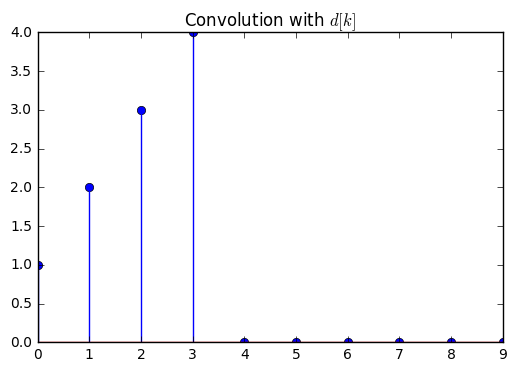

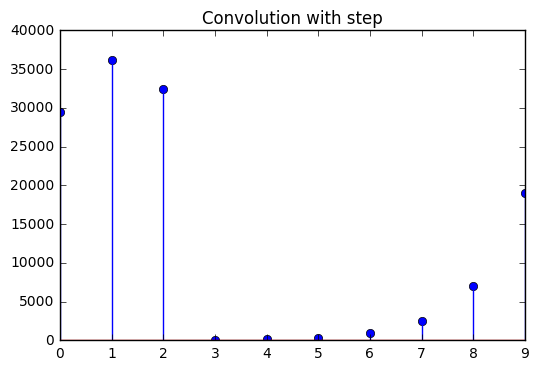

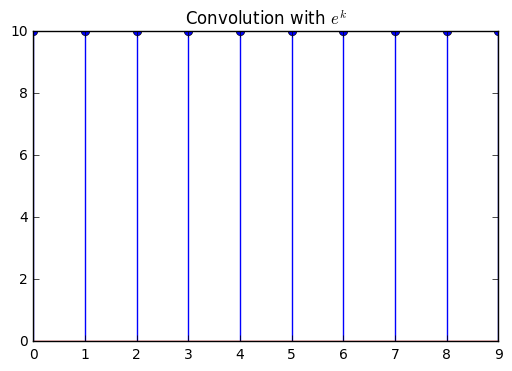

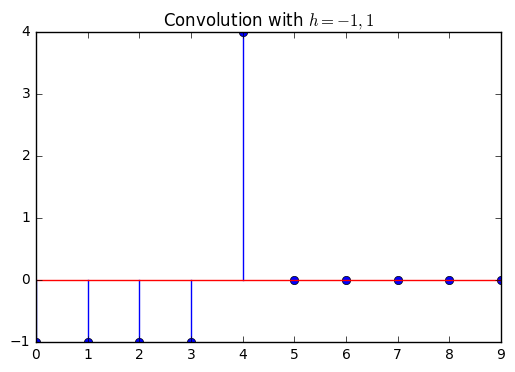

In [2]:
L=10 # length of singal x
N=10 #length of signal h
def conv_fn(x,h):
    L=len(x)
    N=len(h)
    hp=h
    h=np.append(hp,np.zeros(L))
    y=[np.dot(np.roll(x[::-1],k+1),hp)for k in np.arange(N)]
    return np.asarray(y)
x=[1,2,3,4,0,0,0,0,0,0]
h=[1,0,0,0,0,0,0,0,0,0]
y1=conv_fn(x,h)
k1=[0,1,2,3,4,5,6,7,8,9]
ke=np.exp(k1)
y2=conv_fn(x,ke)
h2=[1,1,1,1,1,1,1,1,1,1]
y3=conv_fn(x,h2)
h3=[-1,1,0,0,0,0,0,0,0,0]
y4=conv_fn(x,h3)
plt.figure()
plt.stem(y1)
plt.title('Convolution with $d[k]$')
plt.figure()
plt.stem(y2)
plt.title('Convolution with step')
plt.figure()
plt.stem(y3)
plt.title('Convolution with $e^k$')         
plt.figure()
plt.stem(y4)
plt.title('Convolution with $h={-1,1}$')

## Exercise 2- 2D Convolution

**2.1** Define a 2D convolution function (Only consider zero-padding the image)

**2.2** Using your function, smooth the `lena` image with the following Gaussian kernel:
$$ K = \frac{1.}{256}\begin{bmatrix} 1 & 4 & 6 & 4 & 1 \\ 4 & 16 & 24 & 16 & 4 \\ 6 & 24 & 36 & 24 & 6 \\ 4 & 16 & 24 & 16 & 4 \\ 1 & 4 & 6 & 4 & 1 \end{bmatrix}$$

**2.3** Apply sobel filtering using convolution


In [32]:
def conv_2D_fn(f,g):
    # f is an image and is indexed by (v,w)
    #g is a filter kernel and is indexed by (s,t)
    v_max=f.shape[0]
    w_max=f.shape[1]
    s_max=g.shape[0]
    t_max=g.shape[1]
    s_mid=s_max//2
    t_mid=t_max//2
    x_max=v_max+2*s_mid
    y_max=w_max+2*t_mid
    h_im=np.zeros([x_max,y_max], dtype=f.dtype)
    
    for x in range(x_max):
        for y in range(y_max):
            s_from=max(s_mid - x, -s_mid)
            s_to=min((x_max -x), -s_mid, s_mid+1)
            t_from=max(t_mid -y, -t_mid)
            t_to=min((y_max -y) -t_mid, t_mid+1)
            value=0
            for s in range(s_from,s_to):
                for t in range(t_from,t_to):
                    v=x-s_mid+s
                    w=y-t_mid+t
                    value+=g[s_mid-s,t_mid-t]*f[v,w]
            h[x,y]=value
    return h
                    

TypeError: list indices must be integers or slices, not tuple

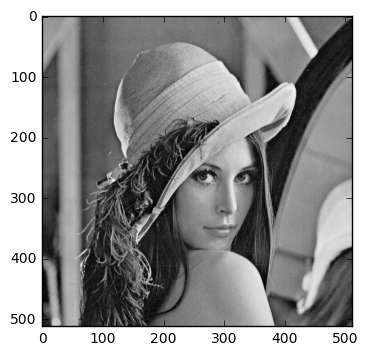

In [46]:
im=mpimg.imread('../images/lena-grey.bmp')
plt.imshow(im,cmap="gray")
f1=np.asarray(im, dtype=np.float32)
r=1/256
k=np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]],dtype=np.float)

y_img=conv_2D_fn(f1,k)



## Exercise 3 - Character recognition using cross-correlation

**3.1** load `a.png` and `text.png` images and binarized them using [`threshold_otsu`](http://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=filters#skimage.filters.threshold_otsu)

**3.2** Use [`signal.correlate2d`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.correlate2d.html#scipy.signal.correlate2d) from `scipy` to correlate your binarized images.
**Note, signal correspond to the bright pixels within and image (invert your masks)**

**3.3** Find the first 10 characters recognized as `a`.